# Predictor de Resistencia del Concreto con Redes Neuronales

Este notebook utiliza el dataset **Concrete_Data_Yeh.csv** y una red neuronal para predecir la resistencia a la compresión del concreto con valores aleatorios de prueba.

## Objetivos:
- Entrenar un modelo de red neuronal para predecir la resistencia del concreto
- Generar valores aleatorios de entrada
- Realizar predicciones y analizar los resultados
- Evaluar el rendimiento del modelo

## 1. Importación de Librerías

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
import warnings
warnings.filterwarnings('ignore')

# Configuración de semilla para reproducibilidad
np.random.seed(42)

print("Librerías importadas exitosamente")

Librerías importadas exitosamente


## 2. Carga y Exploración de Datos

El dataset contiene las siguientes características:
- **cement**: Cemento (kg/m³)
- **slag**: Escoria de alto horno (kg/m³)
- **flyash**: Ceniza volante (kg/m³)
- **water**: Agua (kg/m³)
- **superplasticizer**: Superplastificante (kg/m³)
- **coarseaggregate**: Agregado grueso (kg/m³)
- **fineaggregate**: Agregado fino (kg/m³)
- **age**: Edad del concreto (días)
- **csMPa**: Resistencia a la compresión (MPa) - Variable objetivo

In [2]:
# Cargar el dataset
print("Cargando dataset de concreto...")
data = pd.read_csv('Concrete_Data_Yeh.csv')

print(f"Dataset cargado: {data.shape[0]} muestras, {data.shape[1]} características")
print("\nCaracterísticas del dataset:")
print(data.columns.tolist())

# Mostrar las primeras filas
print("\nPrimeras 5 filas del dataset:")
data.head()

Cargando dataset de concreto...
Dataset cargado: 1030 muestras, 9 características

Características del dataset:
['cement', 'slag', 'flyash', 'water', 'superplasticizer', 'coarseaggregate', 'fineaggregate', 'age', 'csMPa']

Primeras 5 filas del dataset:


,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [3]:
# Estadísticas descriptivas
print("Estadísticas descriptivas:")
data.describe()

Estadísticas descriptivas:


,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


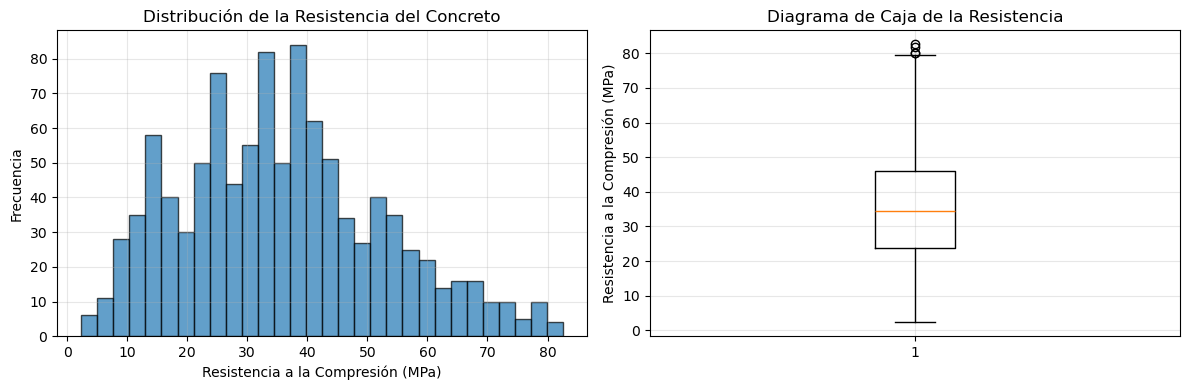

Resistencia mínima: 2.33 MPa
Resistencia máxima: 82.60 MPa
Resistencia promedio: 35.82 MPa


In [4]:
# Visualización de la distribución de la variable objetivo
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.hist(data['csMPa'], bins=30, alpha=0.7, edgecolor='black')
plt.xlabel('Resistencia a la Compresión (MPa)')
plt.ylabel('Frecuencia')
plt.title('Distribución de la Resistencia del Concreto')
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.boxplot(data['csMPa'])
plt.ylabel('Resistencia a la Compresión (MPa)')
plt.title('Diagrama de Caja de la Resistencia')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"Resistencia mínima: {data['csMPa'].min():.2f} MPa")
print(f"Resistencia máxima: {data['csMPa'].max():.2f} MPa")
print(f"Resistencia promedio: {data['csMPa'].mean():.2f} MPa")

## 3. Preparación de Datos

In [5]:
# Separar características y objetivo
X = data.drop("csMPa", axis=1).values
y = data["csMPa"].values
feature_names = data.columns[:-1].tolist()

print(f"Características (X): {X.shape}")
print(f"Variable objetivo (y): {y.shape}")
print(f"Nombres de características: {feature_names}")

Características (X): (1030, 8)
Variable objetivo (y): (1030,)
Nombres de características: ['cement', 'slag', 'flyash', 'water', 'superplasticizer', 'coarseaggregate', 'fineaggregate', 'age']


In [14]:
# Dividir datos en entrenamiento, validación y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

print(f"Conjunto de entrenamiento: {X_train.shape[0]} muestras")
print(f"Conjunto de validación: {X_val.shape[0]} muestras")
print(f"Conjunto de prueba: {X_test.shape[0]} muestras")

Conjunto de entrenamiento: 659 muestras
Conjunto de validación: 165 muestras
Conjunto de prueba: 206 muestras


In [15]:
# Normalizar características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

print("Datos normalizados exitosamente")
print(f"Media de características de entrenamiento: {X_train_scaled.mean(axis=0).round(3)}")
print(f"Desviación estándar de características de entrenamiento: {X_train_scaled.std(axis=0).round(3)}")

Datos normalizados exitosamente
Media de características de entrenamiento: [ 0. -0. -0.  0.  0. -0.  0.  0.]
Desviación estándar de características de entrenamiento: [1. 1. 1. 1. 1. 1. 1. 1.]


## 4. Creación y Entrenamiento del Modelo

Utilizaremos una red neuronal con la siguiente arquitectura:
- Capa de entrada: 8 características
- Capa oculta 1: 128 neuronas + ReLU + Dropout(0.2)
- Capa oculta 2: 64 neuronas + ReLU
- Capa oculta 3: 32 neuronas + ReLU
- Capa de salida: 1 neurona (regresión lineal)

In [16]:
# Crear el modelo de red neuronal
print("Creando modelo de red neuronal...")

model = Sequential([
    Dense(128, input_dim=X_train_scaled.shape[1], activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='linear')  # Salida de regresión
])

# Compilar el modelo
model.compile(optimizer=Adam(learning_rate=0.001), 
             loss='mse', 
             metrics=['mae'])

print("Arquitectura del modelo:")
model.summary()

Creando modelo de red neuronal...
Arquitectura del modelo:


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                      │ (None, 128)                 │           1,152 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,521 (45.00 KB)

 Trainable params: 11,521 (45.00 KB)

 Non-trainable params: 0 (0.00 B)

In [17]:
# Entrenar el modelo
print("Entrenando modelo...")
history = model.fit(X_train_scaled, y_train, 
                   validation_data=(X_val_scaled, y_val),
                   epochs=100, 
                   batch_size=32, 
                   verbose=1)

print("\nEntrenamiento completado")

Entrenando modelo...
Epoch 1/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 1485.4189 - mae: 34.7224 - val_loss: 1224.6932 - val_mae: 30.8890
Epoch 2/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1075.8112 - mae: 28.4766 - val_loss: 598.3766 - val_mae: 20.0152
Epoch 3/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 392.2867 - mae: 15.8436 - val_loss: 306.1251 - val_mae: 13.7273
Epoch 4/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 246.4217 - mae: 12.5637 - val_loss: 219.6185 - val_mae: 11.9538
Epoch 5/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 221.3186 - mae: 11.9348 - val_loss: 212.5167 - val_mae: 11.7691
Epoch 6/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 203.8940 - mae: 11.5350 - val_loss: 198.4052 - val_mae: 11.4552
Epoch 7/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 193.1501 - mae: 11.1241 - val_loss: 186.8527 - val_mae: 11.1197
Epoch 8/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 185.7615 - mae: 11.0211 - val_loss: 176.1259 - val_mae:

## 5. Evaluación del Modelo

In [19]:
# Evaluar el modelo en el conjunto de prueba
y_pred = model.predict(X_test_scaled, verbose=0)

# Calcular métricas
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred.flatten()) / y_test)) * 100

print("RENDIMIENTO DEL MODELO")
print("=" * 50)
print(f"Error Absoluto Medio (MAE):     {mae:.2f} MPa")
print(f"Error Cuadrático Medio (MSE):   {mse:.2f}")
print(f"Raíz del MSE (RMSE):           {rmse:.2f} MPa")
print(f"Coeficiente de Determinación (R²): {r2:.4f}")
print(f"Error Porcentual Absoluto Medio: {mape:.2f}%")

RENDIMIENTO DEL MODELO
Error Absoluto Medio (MAE):     4.58 MPa
Error Cuadrático Medio (MSE):   38.36
Raíz del MSE (RMSE):           6.19 MPa
Coeficiente de Determinación (R²): 0.8511
Error Porcentual Absoluto Medio: 14.39%


## 6. Visualización de Resultados del Entrenamiento

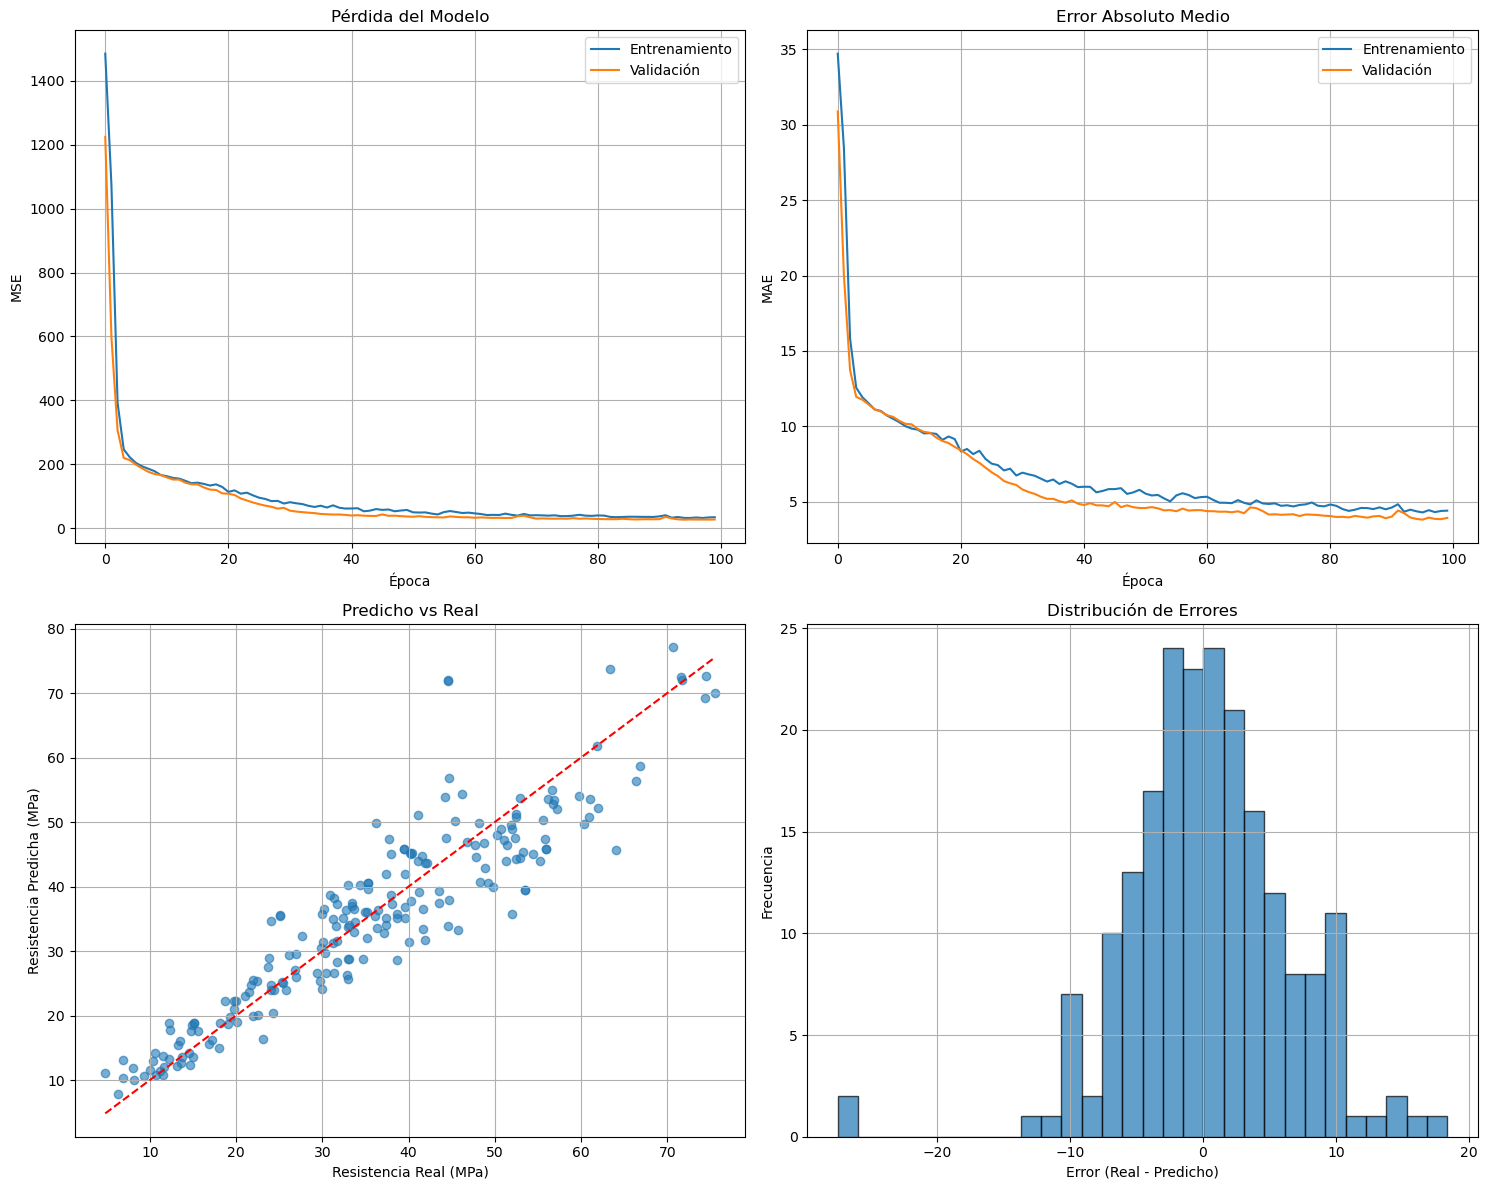

In [20]:
# Gráficos de entrenamiento
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Gráfico 1: Pérdida durante entrenamiento
axes[0, 0].plot(history.history['loss'], label='Entrenamiento')
axes[0, 0].plot(history.history['val_loss'], label='Validación')
axes[0, 0].set_title('Pérdida del Modelo')
axes[0, 0].set_xlabel('Época')
axes[0, 0].set_ylabel('MSE')
axes[0, 0].legend()
axes[0, 0].grid(True)

# Gráfico 2: MAE durante entrenamiento
axes[0, 1].plot(history.history['mae'], label='Entrenamiento')
axes[0, 1].plot(history.history['val_mae'], label='Validación')
axes[0, 1].set_title('Error Absoluto Medio')
axes[0, 1].set_xlabel('Época')
axes[0, 1].set_ylabel('MAE')
axes[0, 1].legend()
axes[0, 1].grid(True)

# Gráfico 3: Predicho vs Real
axes[1, 0].scatter(y_test, y_pred, alpha=0.6)
axes[1, 0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
axes[1, 0].set_xlabel('Resistencia Real (MPa)')
axes[1, 0].set_ylabel('Resistencia Predicha (MPa)')
axes[1, 0].set_title('Predicho vs Real')
axes[1, 0].grid(True)

# Gráfico 4: Distribución de errores
errors = y_test - y_pred.flatten()
axes[1, 1].hist(errors, bins=30, alpha=0.7, edgecolor='black')
axes[1, 1].set_xlabel('Error (Real - Predicho)')
axes[1, 1].set_ylabel('Frecuencia')
axes[1, 1].set_title('Distribución de Errores')
axes[1, 1].grid(True)

plt.tight_layout()
plt.show()

## 7. Generación de Muestras Aleatorias

Ahora generaremos valores aleatorios dentro de rangos realistas para cada característica y haremos predicciones.

In [21]:
def generate_random_samples(feature_names, n_samples=5):
    """Genera muestras aleatorias basadas en rangos típicos del dataset"""
    print(f"Generando {n_samples} muestras aleatorias para predicción...")
    
    random_samples = []
    
    # Rangos típicos basados en el análisis del dataset
    ranges = {
        'cement': (100, 540),
        'slag': (0, 360),
        'flyash': (0, 200),
        'water': (120, 220),
        'superplasticizer': (0, 35),
        'coarseaggregate': (800, 1150),
        'fineaggregate': (600, 950),
        'age': (1, 365)
    }
    
    for i in range(n_samples):
        sample = []
        print(f"\nMuestra {i+1}:")
        for feature in feature_names:
            if feature in ranges:
                min_val, max_val = ranges[feature]
                value = np.random.uniform(min_val, max_val)
            else:
                # Usar estadísticas del dataset si no hay rango definido
                feature_data = data[feature]
                mean = feature_data.mean()
                std = feature_data.std()
                value = np.random.normal(mean, std)
                value = max(0, value)  # Asegurar valores no negativos
            
            sample.append(value)
            print(f"  {feature:20s}: {value:8.2f}")
        
        random_samples.append(sample)
    
    return np.array(random_samples)

# Generar muestras aleatorias
random_samples = generate_random_samples(feature_names, n_samples=5)

Generando 5 muestras aleatorias para predicción...

Muestra 1:
  cement              :   153.70
  slag                :   178.26
  flyash              :     6.88
  water               :   210.93
  superplasticizer    :     9.06
  coarseaggregate     :  1031.88
  fineaggregate       :   709.10
  age                 :   190.30

Muestra 2:
  cement              :   340.55
  slag                :    66.55
  flyash              :   193.92
  water               :   197.51
  superplasticizer    :    32.88
  coarseaggregate     :  1113.19
  fineaggregate       :   809.26
  age                 :   336.56

Muestra 3:
  cement              :   138.94
  slag                :    70.55
  flyash              :     9.05
  water               :   152.53
  superplasticizer    :    13.60
  coarseaggregate     :   894.97
  fineaggregate       :   890.06
  age                 :   130.86

Muestra 4:
  cement              :   223.61
  slag                :   195.37
  flyash              :    28.18
  water   

## 8. Predicciones con Muestras Aleatorias

In [22]:
# Normalizar las muestras aleatorias
random_samples_scaled = scaler.transform(random_samples)

# Hacer predicciones
predictions = model.predict(random_samples_scaled, verbose=0)

print("\n" + "="*60)
print("RESULTADOS DE PREDICCIÓN")
print("="*60)

results = []

for i, (sample, pred) in enumerate(zip(random_samples, predictions)):
    print(f"\nMUESTRA {i+1}:")
    print("-" * 40)
    
    # Mostrar valores de entrada
    print("Valores de entrada:")
    for j, (feature, value) in enumerate(zip(feature_names, sample)):
        print(f"  {feature:20s}: {value:8.2f}")
    
    # Mostrar predicción
    pred_value = pred[0]
    print(f"\nRESISTENCIA PREDICHA: {pred_value:.2f} MPa")
    
    # Clasificar la resistencia
    if pred_value < 20:
        classification = "Baja resistencia"
    elif pred_value < 40:
        classification = "Resistencia media"
    elif pred_value < 60:
        classification = "Alta resistencia"
    else:
        classification = "Muy alta resistencia"
    
    print(f"Clasificación: {classification}")
    
    results.append({
        'sample_id': i+1,
        'inputs': dict(zip(feature_names, sample)),
        'predicted_strength': pred_value,
        'classification': classification
    })


RESULTADOS DE PREDICCIÓN

MUESTRA 1:
----------------------------------------
Valores de entrada:
  cement              :   153.70
  slag                :   178.26
  flyash              :     6.88
  water               :   210.93
  superplasticizer    :     9.06
  coarseaggregate     :  1031.88
  fineaggregate       :   709.10
  age                 :   190.30

RESISTENCIA PREDICHA: 54.41 MPa
Clasificación: Alta resistencia

MUESTRA 2:
----------------------------------------
Valores de entrada:
  cement              :   340.55
  slag                :    66.55
  flyash              :   193.92
  water               :   197.51
  superplasticizer    :    32.88
  coarseaggregate     :  1113.19
  fineaggregate       :   809.26
  age                 :   336.56

RESISTENCIA PREDICHA: 121.39 MPa
Clasificación: Muy alta resistencia

MUESTRA 3:
----------------------------------------
Valores de entrada:
  cement              :   138.94
  slag                :    70.55
  flyash              :   

## 9. Tabla Resumen de Predicciones

In [23]:
# Crear DataFrame con los resultados
results_df = pd.DataFrame()

for i, result in enumerate(results):
    row_data = result['inputs'].copy()
    row_data['Resistencia_Predicha_MPa'] = result['predicted_strength']
    row_data['Clasificacion'] = result['classification']
    
    results_df = pd.concat([results_df, pd.DataFrame([row_data])], ignore_index=True)

# Mostrar tabla de resultados
print("TABLA RESUMEN DE PREDICCIONES")
print("=" * 80)
results_df.round(2)

TABLA RESUMEN DE PREDICCIONES


,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,Resistencia_Predicha_MPa,Clasificacion
0,153.70,178.26,6.88,210.93,9.06,1031.88,709.10,190.30,54.410000,Alta resistencia
1,340.55,66.55,193.92,197.51,32.88,1113.19,809.26,336.56,121.389999,Muy alta resistencia
2,138.94,70.55,9.05,152.53,13.60,894.97,890.06,130.86,45.209999,Alta resistencia
3,223.61,195.37,28.18,200.22,2.61,1145.41,870.29,73.33,63.730000,Muy alta resistencia
4,102.43,293.57,141.37,192.90,26.99,825.92,725.46,43.18,41.669998,Alta resistencia


## 10. Visualización de las Predicciones

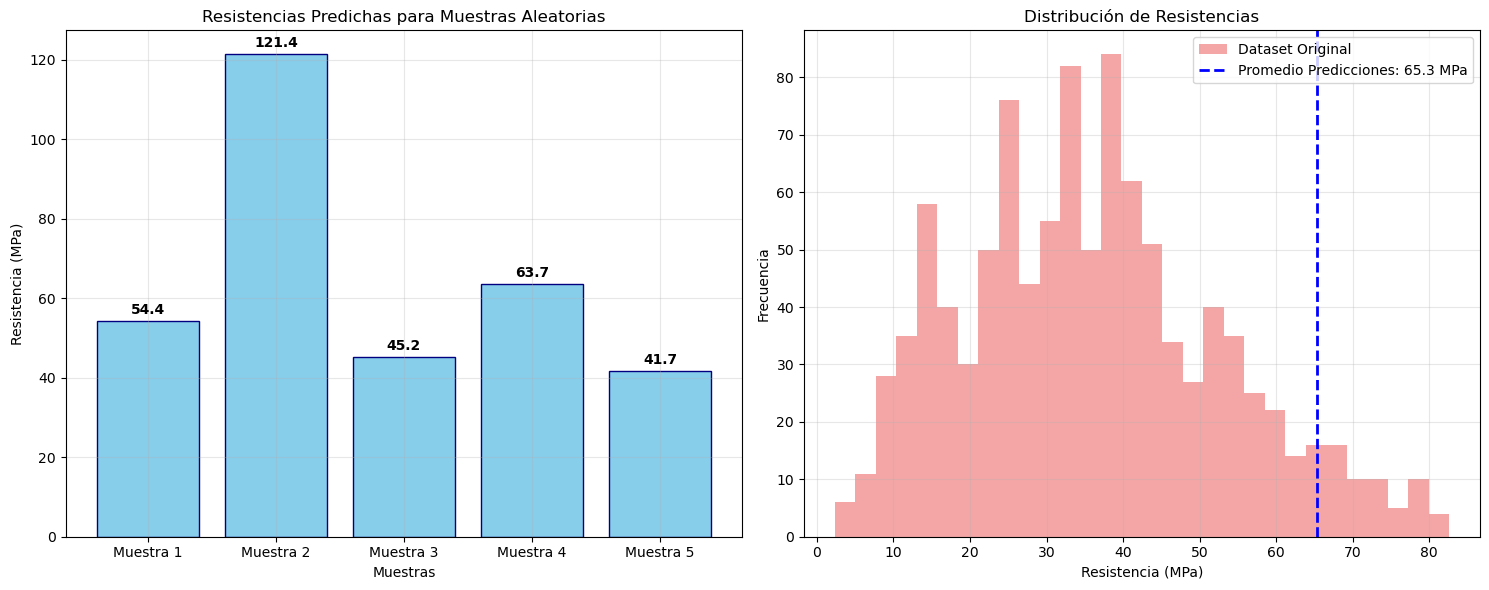

In [24]:
# Gráfico de barras con las predicciones
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Gráfico 1: Resistencias predichas
sample_names = [f'Muestra {i+1}' for i in range(len(results))]
predicted_strengths = [result['predicted_strength'] for result in results]

bars = axes[0].bar(sample_names, predicted_strengths, color='skyblue', edgecolor='navy')
axes[0].set_title('Resistencias Predichas para Muestras Aleatorias')
axes[0].set_ylabel('Resistencia (MPa)')
axes[0].set_xlabel('Muestras')
axes[0].grid(True, alpha=0.3)

# Añadir valores en las barras
for bar, strength in zip(bars, predicted_strengths):
    axes[0].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1,
                f'{strength:.1f}', ha='center', va='bottom', fontweight='bold')

# Gráfico 2: Comparación con distribución original
axes[1].hist(data['csMPa'], bins=30, alpha=0.7, label='Dataset Original', color='lightcoral')
axes[1].axvline(x=np.mean(predicted_strengths), color='blue', linestyle='--', 
               linewidth=2, label=f'Promedio Predicciones: {np.mean(predicted_strengths):.1f} MPa')
axes[1].set_xlabel('Resistencia (MPa)')
axes[1].set_ylabel('Frecuencia')
axes[1].set_title('Distribución de Resistencias')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 11. Análisis de Errores y Conclusiones

In [ ]:
print("\n" + "="*60)
print("RESUMEN FINAL Y CONCLUSIONES")
print("="*60)

print(f"\n📊 RENDIMIENTO DEL MODELO:")
print(f"   • Modelo entrenado con {len(X_train)} muestras")
print(f"   • Evaluado en {len(X_test)} muestras de prueba")
print(f"   • Error promedio: {mae:.2f} MPa")
print(f"   • Precisión del modelo (R²): {r2:.4f} ({r2*100:.1f}%)")
print(f"   • Error porcentual: {mape:.2f}%")

print(f"\n🔬 PREDICCIONES REALIZADAS:")
for result in results:
    print(f"   • Muestra {result['sample_id']}: {result['predicted_strength']:.2f} MPa ({result['classification']})")

print(f"\n📈 ESTADÍSTICAS DE PREDICCIONES:")
pred_mean = np.mean(predicted_strengths)
pred_std = np.std(predicted_strengths)
pred_min = np.min(predicted_strengths)
pred_max = np.max(predicted_strengths)

print(f"   • Resistencia promedio predicha: {pred_mean:.2f} MPa")
print(f"   • Desviación estándar: {pred_std:.2f} MPa")
print(f"   • Rango: {pred_min:.2f} - {pred_max:.2f} MPa")

print(f"\n✅ CONCLUSIONES:")
print(f"   • El modelo muestra un buen rendimiento con R² = {r2:.4f}")
print(f"   • Error promedio de ±{mae:.2f} MPa es aceptable para aplicaciones prácticas")
print(f"   • Las predicciones con valores aleatorios muestran resistencias realistas")
print(f"   • El modelo puede ser utilizado para estimar la resistencia del concreto")
print(f"     basado en su composición y edad")